## Step 1: Pull Data from yahoo finance

In [302]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import plotly.offline as p
import plotly.graph_objs as go

import matplotlib.pyplot as plt

import json

p.init_notebook_mode(connected=True)
from IPython.display import Image

In [277]:
url_key_statistics = "https://finance.yahoo.com/quote/TSLA/key-statistics"
url_holders = "https://finance.yahoo.com/quote/TSLA/holders"
url_sustainability = "https://finance.yahoo.com/quote/TSLA/sustainability"
url_SnP_Wiki = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
url_edgar_company_api = "http://datafied.api.edgar-online.com/v2/companies?primarysymbols=msft&appkey="
edgar_app_key = "ubkhn2ar6ck4m7fhvhp9gqp2"


In [66]:
response = requests.get(url_sustainability)

In [291]:
# response.text

In [288]:
beautsoup_object = BeautifulSoup(response.text, 'html.parser')
# Tells BeautifulSoup that we'd like to use the 'html' parser

In [290]:
# print(beautsoup_object.prettify())

In [70]:
# beautsoup_object.select(".Fz(36px)") -- alternate way but below is more accurate

In [71]:
beautsoup_object.find_all('div', class_ = "Fz(36px)", attrs={"data-reactid": "20"})[0].text

'61'

In [124]:
def getBeatifulResponse(url):
    """Function that gets the response using the URL"""
    response = requests.get(url)
    beautsoup_object = BeautifulSoup(response.text, 'html.parser')
#     print(beautsoup_object.prettify())
    return beautsoup_object

In [172]:
def getSustainabilityScore(url):
    """Function that calls getBeatifulResponse and then extracts 
    Sustainability score from the response"""
    score = None
    try:
        bsoupobj = getBeatifulResponse(url)
        score = int(bsoupobj.find_all('div', class_ = "Fz(36px)", attrs={"data-reactid": "20"})[0].text)
    finally:
        return score
    

In [173]:
getSustainabilityScore(url_sustainability)

In [271]:
def getHolders(url):
    """Function that calls getBeatifulResponse and then extracts 
    list of holders from the response"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find_all('td', {'class': 'Py(10px) Va(m) Fw(b) W(15%)'})
    holders = []
    try:
        for row in table:
            holder = row.text
            holders.append(holder)
#     except:
#         holders = [None,None]
    finally:
        return holders

In [157]:
getHolders(url_holders)

['25.19%', '59.53%', '79.57%', '1,005']

In [153]:
bsoupobj = getBeatifulResponse("https://finance.yahoo.com/quote/TSLA/holders")
# print(bsoupobj.prettify())
# bsoupobj.find_all(class_ = "Py(10px)")
table = bsoupobj.find_all('td', {'class': 'Py(10px) Va(m) Fw(b) W(15%)'})
holders = []
for row in table:
    print(row)
    holder = row.text
    holders.append(holder)
holders

<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="26">25.19%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="30">59.53%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="34">79.57%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="38">1,005</td>


['25.19%', '59.53%', '79.57%', '1,005']

In [263]:
def getSnPCompanies(url):
    """Function that scrapes the list of S&P 500 companies from Wikipedia"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find('table', {'class': 'wikitable sortable'})
    companies = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.','-')
        company_name = row.findAll('td')[1].text
        companies.append([ticker,company_name])
    return companies

In [198]:
# companies = getSnPCompanies(url_SnP_Wiki)

In [215]:
# companies

In [189]:
bsoupobj = getBeatifulResponse("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
# print(bsoupobj.prettify())
table = bsoupobj.find('table', {'class': 'wikitable sortable'})
tickers = []
company_names = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    company_name = row.findAll('td')[1].text
#     print(ticker)
    tickers.append(ticker)
    company_names.append(company_name)

In [216]:
# company_names

In [205]:
# companies_info = []
# for company in companies[:10]:
#     url_key_statistics = "https://finance.yahoo.com/quote/" + company[0] + "/key-statistics"
#     url_sustainability = "https://finance.yahoo.com/quote/" + company[0] + "/sustainability"
#     url_holders = "https://finance.yahoo.com/quote/"        + company[0] + "/holders"
#     sustainability = getSustainabilityScore(url_sustainability)
#     holders = getHolders(url_holders)

#     company_stats ={}
#     company_stats['COMPANY'] = company[0]
#     company_stats['SUSTAINABILITY_SCORE'] = sustainability
#     company_stats['HOLDERS'] = holders
    
#     companies_info.append(company_stats)
# #     print (company_stats)
# #     print(companies)
#     if len(companies_info) == 1:
#         print('Scraping data', end="")
#     print('.', end="")
# companies_info

In [338]:
"http://datafied.api.edgar-online.com/v2/companies?primarysymbols=msft&appkey=" + edgar_app_key

# bsoupobj = getBeatifulResponse(url_edgar_company_api+edgar_app_key)

# type(bsoupobj.get('result'))
# print(bsoupobj)
# print(bsoupobj.json)

response = requests.get(url_edgar_company_api+edgar_app_key)
edgar_json = json.loads(response.text)

# print(edgar_json)
print(edgar_json['result']['rows'][0]['values'][-1]['value'])

Services-Prepackaged Software


In [286]:
"http://datafied.api.edgar-online.com/v2/corefinancials/ytd?primarysymbols=MSFT&appkey=ubkhn2ar6ck4m7fhvhp9gqp2"

'http://datafied.api.edgar-online.com/v2/corefinancials/ytd?primarysymbols=MSFT&appkey=ubkhn2ar6ck4m7fhvhp9gqp2'

## Step 2: Process data into data structures

In [264]:
companies = getSnPCompanies(url_SnP_Wiki)

In [270]:
companies_info = []
for company in companies[69:75]:
    url_key_statistics = "https://finance.yahoo.com/quote/" + company[0] + "/key-statistics"
    url_sustainability = "https://finance.yahoo.com/quote/" + company[0] + "/sustainability"
    url_holders = "https://finance.yahoo.com/quote/"        + company[0] + "/holders"
    sustainability = getSustainabilityScore(url_sustainability)
    holders = getHolders(url_holders)

    company_stats ={}
    company_stats['TICKER'] = company[0]
    company_stats['COMPANY_NAME'] = company[1]
    company_stats['SUSTAINABILITY_SCORE'] = sustainability
    company_stats['INSIDER_HOLDERS_PCT'] = float(holders[0].replace('%','')) if holders[0] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_PCT'] = float(holders[1].replace('%','')) if holders[1] != 'N/A' else None
    company_stats['INSTITUTION_FLOAT_HOLDERS_PCT'] = float(holders[2].replace('%','')) if holders[2] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_NO'] =  int(holders[3].replace(',','')) if holders[3] != 'N/A' else None
    
    companies_info.append(company_stats)
#     print (company_stats)
#     print(companies)
    if len(companies_info) == 1:
        print('Scraping data', end="")
    print('.', end="")
companies_info

Scraping data...........

[{'TICKER': 'BBT',
  'COMPANY_NAME': 'BB&T Corporation',
  'SUSTAINABILITY_SCORE': 49,
  'INSIDER_HOLDERS_PCT': 0.72,
  'INSTITUTION_HOLDERS_PCT': 67.29,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 67.78,
  'INSTITUTION_HOLDERS_NO': 1306},
 {'TICKER': 'BDX',
  'COMPANY_NAME': 'Becton Dickinson',
  'SUSTAINABILITY_SCORE': 65,
  'INSIDER_HOLDERS_PCT': 0.26,
  'INSTITUTION_HOLDERS_PCT': 89.72,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 89.95,
  'INSTITUTION_HOLDERS_NO': 1638},
 {'TICKER': 'BRK-B',
  'COMPANY_NAME': 'Berkshire Hathaway',
  'SUSTAINABILITY_SCORE': 47,
  'INSIDER_HOLDERS_PCT': None,
  'INSTITUTION_HOLDERS_PCT': None,
  'INSTITUTION_FLOAT_HOLDERS_PCT': None,
  'INSTITUTION_HOLDERS_NO': None},
 {'TICKER': 'BBY',
  'COMPANY_NAME': 'Best Buy Co. Inc.',
  'SUSTAINABILITY_SCORE': 67,
  'INSIDER_HOLDERS_PCT': 14.18,
  'INSTITUTION_HOLDERS_PCT': 85.15,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 99.22,
  'INSTITUTION_HOLDERS_NO': 909},
 {'TICKER': 'BIIB',
  'COMPANY_NAME': 'Biogen Inc.',
  'SUSTAINABILITY_SC

## Step 3: Visualize


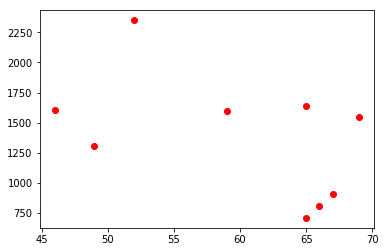

In [273]:
# companies_info.get('SUSTAINABILITY_SCORE')
sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_info]
institution_holders = [company.get('INSTITUTION_HOLDERS_NO') for company in companies_info]

# len(sustainability_scores)
# company[-1]

plt.plot(sustainability_scores, institution_holders, 'ro')

[0.72, 0.26, None, 14.18, 0.39, 3.74, 0.43, 0.1, 0.29, 0.58, 0.6]


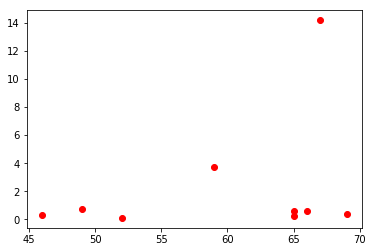

In [275]:
sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_info]
insider_holders = [company.get('INSIDER_HOLDERS_PCT') for company in companies_info]

print(insider_holders)
# len(sustainability_scores)
# company[-1]

plt.plot(sustainability_scores, insider_holders, 'ro')